In [3]:
import sklearn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df1 = pd.read_csv('delhi_traffic_features.csv')
df2 = pd.read_csv('delhi_traffic_target.csv')

In [6]:
df = pd.merge(df1, df2, how = 'left', on='Trip_ID')

In [7]:
df.head()

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,travel_time_minutes
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,Clear,Low,Main Road,37.8,15.3
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,Clear,Low,Main Road,42.7,3.0
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,Rain,High,Inner Road,9.7,92.7
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,Clear,Low,Highway,68.5,10.6
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,Fog,Medium,Highway,30.3,42.0


In [8]:
df.isnull().sum()

Trip_ID                  0
start_area               0
end_area                 0
distance_km              0
time_of_day              0
day_of_week              0
weather_condition        0
traffic_density_level    0
road_type                0
average_speed_kmph       0
travel_time_minutes      0
dtype: int64

In [9]:
df.isna().sum()

Trip_ID                  0
start_area               0
end_area                 0
distance_km              0
time_of_day              0
day_of_week              0
weather_condition        0
traffic_density_level    0
road_type                0
average_speed_kmph       0
travel_time_minutes      0
dtype: int64

In [10]:
df.dtypes

Trip_ID                   object
start_area                object
end_area                  object
distance_km              float64
time_of_day               object
day_of_week               object
weather_condition         object
traffic_density_level     object
road_type                 object
average_speed_kmph       float64
travel_time_minutes      float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                4000 non-null   object 
 1   start_area             4000 non-null   object 
 2   end_area               4000 non-null   object 
 3   distance_km            4000 non-null   float64
 4   time_of_day            4000 non-null   object 
 5   day_of_week            4000 non-null   object 
 6   weather_condition      4000 non-null   object 
 7   traffic_density_level  4000 non-null   object 
 8   road_type              4000 non-null   object 
 9   average_speed_kmph     4000 non-null   float64
 10  travel_time_minutes    4000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 343.9+ KB


In [12]:
df.describe()

,distance_km,average_speed_kmph,travel_time_minutes
count,4000.000000,4000.000000,4000.000000
mean,13.342965,28.085300,40.155925
std,6.367559,17.057224,31.883265
min,1.510000,4.800000,2.100000
25%,8.660000,14.500000,18.400000
50%,13.170000,24.200000,30.300000
75%,17.230000,38.200000,52.100000
max,33.010000,93.300000,283.600000


In [13]:
fig = px.histogram(df,
             x= 'travel_time_minutes',
             marginal= 'box',
             title='distribution of travel time')
fig.update_layout (bargap=0.1)

In [14]:
px.scatter(df.head(1000),
          x = 'distance_km',
          y = 'travel_time_minutes',
          color = 'traffic_density_level',
          title = 'distance VS time')

In [15]:
px.scatter(df.head(1000),
          x = 'travel_time_minutes',
          y = 'average_speed_kmph',
          color = 'traffic_density_level',
          title = 'distance VS time')

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

In [54]:
X = df[['start_area','end_area','distance_km','time_of_day','day_of_week','weather_condition','road_type','average_speed_kmph','travel_time_minutes']]
y= df['traffic_density_level']

In [56]:
num_cols = X.select_dtypes('float64').columns.to_list()
cat_cols = X.select_dtypes('object').columns.to_list()

In [82]:
preprocess = ColumnTransformer([
    ('num', Pipeline([
        ('scale', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ]), cat_cols)
])

In [84]:
pipe = Pipeline([
    ('prep', preprocess),
    ('model', LogisticRegression())
])

In [94]:
modLinear = GridSearchCV(estimator = pipe,
                  param_grid = {'model__solver': ['lbfgs', 'liblinear','saga'],
                               'model__max_iter': [1000,2000, 3000]},
                  cv= 3,
                  scoring = 'accuracy',
                  return_train_score=True )

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [98]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3200, 9) (800, 9) (3200,) (800,)


In [100]:
modLinear.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         ['distance_km',
                                                                          'average_speed_kmph',
                                                                          'travel_time_minutes']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['start_area',
                                                                          'end_area',
                                                                          'time_of_day',
                                                                          'day_of_week',
                                                                          'weather_condition',
                                                                          'road_type'])])),
                                       ('model', LogisticRegression())]),
             param_grid={'model__max_iter': [1000, 2000, 3000],
                         'model__solver': ['lbfgs', 'liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

In [103]:
results = pd.DataFrame(modLinear.cv_results_)

In [105]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_iter,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.071913,0.032065,0.004549,0.001183,1000,lbfgs,"{'model__max_iter': 1000, 'model__solver': 'lb...",0.821931,0.810684,0.814259,0.815625,0.004692,1,0.867792,0.865448,0.853796,0.862345,0.006121
1,0.015820,0.000686,0.003271,0.001183,1000,liblinear,"{'model__max_iter': 1000, 'model__solver': 'li...",0.752577,0.752577,0.746717,0.750624,0.002763,7,0.801688,0.799344,0.791940,0.797657,0.004154
2,0.470080,0.025208,0.002396,0.000243,1000,saga,"{'model__max_iter': 1000, 'model__solver': 'sa...",0.820993,0.810684,0.814259,0.815312,0.004274,4,0.866854,0.865448,0.852858,0.861720,0.006292
3,0.057271,0.001343,0.004542,0.001695,2000,lbfgs,"{'model__max_iter': 2000, 'model__solver': 'lb...",0.821931,0.810684,0.814259,0.815625,0.004692,1,0.867792,0.865448,0.853796,0.862345,0.006121
4,0.016903,0.000946,0.004284,0.001563,2000,liblinear,"{'model__max_iter': 2000, 'model__solver': 'li...",0.752577,0.752577,0.746717,0.750624,0.002763,7,0.801688,0.799344,0.791940,0.797657,0.004154
5,0.488206,0.016512,0.013034,0.014354,2000,saga,"{'model__max_iter': 2000, 'model__solver': 'sa...",0.820993,0.810684,0.814259,0.815312,0.004274,4,0.866854,0.865448,0.852858,0.861720,0.006292
6,0.066027,0.009399,0.003135,0.001213,3000,lbfgs,"{'model__max_iter': 3000, 'model__solver': 'lb...",0.821931,0.810684,0.814259,0.815625,0.004692,1,0.867792,0.865448,0.853796,0.862345,0.006121
7,0.014298,0.001540,0.004212,0.001029,3000,liblinear,"{'model__max_iter': 3000, 'model__solver': 'li...",0.752577,0.752577,0.746717,0.750624,0.002763,7,0.801688,0.799344,0.791940,0.797657,0.004154
8,0.477316,0.025664,0.003052,0.000817,3000,saga,"{'model__max_iter': 3000, 'model__solver': 'sa...",0.820993,0.810684,0.814259,0.815312,0.004274,4,0.866854,0.865448,0.852858,0.861720,0.006292


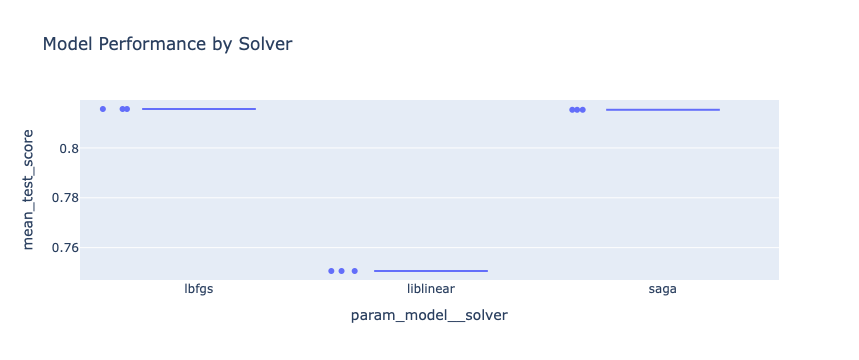

In [117]:
fig = px.box(
    results,
    x="param_model__solver",
    y="mean_test_score",
    points="all",
    title="Model Performance by Solver"
)
fig.show()

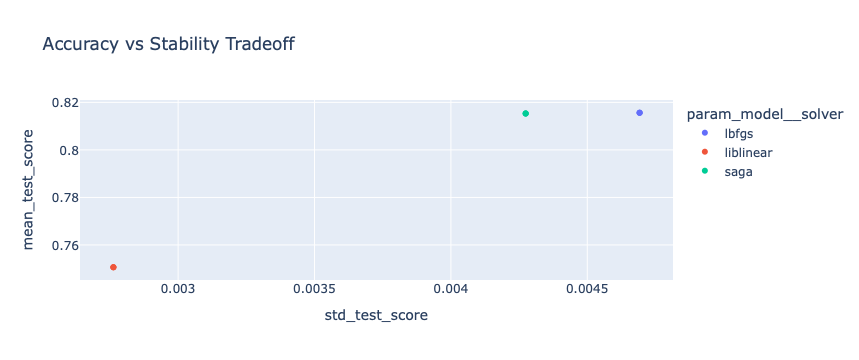

In [121]:
fig = px.scatter(
    results,
    x="std_test_score",
    y="mean_test_score",
    color="param_model__solver",
    hover_data=["rank_test_score"],
    title="Accuracy vs Stability Tradeoff"
)
fig.show()

In [123]:
results["generalization_gap"] = (
    results["mean_train_score"] - results["mean_test_score"]
)

In [125]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_iter,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,generalization_gap
0,0.071913,0.032065,0.004549,0.001183,1000,lbfgs,"{'model__max_iter': 1000, 'model__solver': 'lb...",0.821931,0.810684,0.814259,0.815625,0.004692,1,0.867792,0.865448,0.853796,0.862345,0.006121,0.046721
1,0.015820,0.000686,0.003271,0.001183,1000,liblinear,"{'model__max_iter': 1000, 'model__solver': 'li...",0.752577,0.752577,0.746717,0.750624,0.002763,7,0.801688,0.799344,0.791940,0.797657,0.004154,0.047033
2,0.470080,0.025208,0.002396,0.000243,1000,saga,"{'model__max_iter': 1000, 'model__solver': 'sa...",0.820993,0.810684,0.814259,0.815312,0.004274,4,0.866854,0.865448,0.852858,0.861720,0.006292,0.046408
3,0.057271,0.001343,0.004542,0.001695,2000,lbfgs,"{'model__max_iter': 2000, 'model__solver': 'lb...",0.821931,0.810684,0.814259,0.815625,0.004692,1,0.867792,0.865448,0.853796,0.862345,0.006121,0.046721
4,0.016903,0.000946,0.004284,0.001563,2000,liblinear,"{'model__max_iter': 2000, 'model__solver': 'li...",0.752577,0.752577,0.746717,0.750624,0.002763,7,0.801688,0.799344,0.791940,0.797657,0.004154,0.047033
5,0.488206,0.016512,0.013034,0.014354,2000,saga,"{'model__max_iter': 2000, 'model__solver': 'sa...",0.820993,0.810684,0.814259,0.815312,0.004274,4,0.866854,0.865448,0.852858,0.861720,0.006292,0.046408
6,0.066027,0.009399,0.003135,0.001213,3000,lbfgs,"{'model__max_iter': 3000, 'model__solver': 'lb...",0.821931,0.810684,0.814259,0.815625,0.004692,1,0.867792,0.865448,0.853796,0.862345,0.006121,0.046721
7,0.014298,0.001540,0.004212,0.001029,3000,liblinear,"{'model__max_iter': 3000, 'model__solver': 'li...",0.752577,0.752577,0.746717,0.750624,0.002763,7,0.801688,0.799344,0.791940,0.797657,0.004154,0.047033
8,0.477316,0.025664,0.003052,0.000817,3000,saga,"{'model__max_iter': 3000, 'model__solver': 'sa...",0.820993,0.810684,0.814259,0.815312,0.004274,4,0.866854,0.865448,0.852858,0.861720,0.006292,0.046408
